<h2 id="exercises">Exercises</h2>
<p>For all of the datasets below, examine the data types of each column, ensure
that the dates are in the proper format, and set the dataframe's index to the
date column as appropriate.</p>
<p>For this exercise you'll need to install a library that will provide us access
to some more datasets:</p>
<div class="highlight"><pre><span></span>pip install vega_datasets
</pre></div>

<p>You can use this library like so:</p>


In [1]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [2]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

---


<p>Use the above dataset for the exercises below:</p>



In [5]:
from vega_datasets import data
df =data.sf_temps()

In [6]:
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [7]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [8]:
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00
...,...
2010-12-31 19:00:00,50.40
2010-12-31 20:00:00,49.90
2010-12-31 21:00:00,49.40


1. Resample by the day and take the average temperature. Visualize the average
   temperature over time.


In [11]:
df.resample('1D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


NumExpr defaulting to 8 threads.


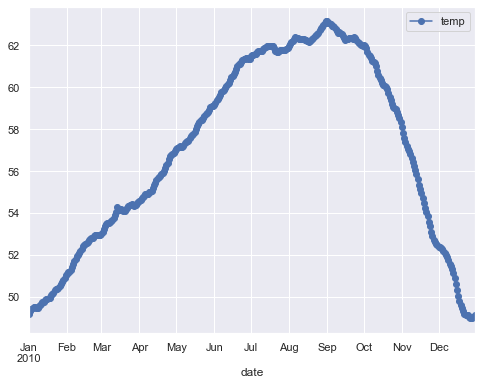

In [10]:
df.resample('1D').mean().plot(marker='o');


2. Write the code necessary to visualize the minimum temperature over time.


3. Write the code necessary to visualize the maximum temperature over time.
   


4. Which month is the coldest, on average?


In [13]:
month =df.resample('M').mean()

In [15]:
month.head()

,temp
date,
2010-01-31,49.98
2010-02-28,52.24
2010-03-31,53.96
2010-04-30,55.63
2010-05-31,57.97


In [17]:
month.sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98


5.  Which month has the highest average temperature?
  


In [18]:
month.sort_values(by='temp', ascending=False).head(1)

,temp
date,
2010-09-30,62.49


6. Resample by the day and calculate the min and max temp for the day (Hint:
   <code>.agg(['min', 'max'])</code>). Use this resampled dataframe to calculate the change
   in temperature for the day. Which month has the highest daily temperature
   variability?
   


In [19]:
day =df.resample('D').mean()

In [24]:
day['yesterday_temp']=day.temp.shift(1)

In [26]:
day['daily_delta']=day.temp-day.yesterday_temp

In [27]:
day.head()

,temp,yesterday_temp,daily_delta
date,,,
2010-01-01,49.17,NaN,NaN
2010-01-02,49.30,49.17,0.13
2010-01-03,49.39,49.30,0.09
2010-01-04,49.45,49.39,0.05
2010-01-05,49.49,49.45,0.05


In [28]:
month = day.resample('M').mean()

In [31]:
month['abs_daily_delta']=abs(month.daily_delta)

In [32]:
month.head()

,temp,yesterday_temp,daily_delta,abs_daily_delta
date,,,,
2010-01-31,49.98,49.95,0.06,0.06
2010-02-28,52.24,52.18,0.07,0.07
2010-03-31,53.96,53.91,0.05,0.05
2010-04-30,55.63,55.55,0.08,0.08
2010-05-31,57.97,57.90,0.07,0.07


In [35]:
month.sort_values(by='abs_daily_delta', ascending=False).head()

,temp,yesterday_temp,daily_delta,abs_daily_delta
date,,,,
2010-11-30,55.19,55.38,-0.20,0.20
2010-10-31,60.25,60.37,-0.12,0.12
2010-12-31,50.50,50.61,-0.11,0.11
2010-04-30,55.63,55.55,0.08,0.08
2010-06-30,60.44,60.37,0.07,0.07


<strong>Bonus</strong>: Visualize the daily min, average, and max temperature over time on a
   single line plot, i.e. the min, average, and maximum temperature should be 3
   seperate lines.</li>
   


</ol>
<hr />



<div class="highlight"><pre><span></span><span class="kn">from</span> <span class="nn">vega_datasets</span> <span class="kn">import</span> <span class="n">data</span>
<span class="n">data</span><span class="o">.</span><span class="n">seattle_weather</span><span class="p">()</span>
</pre></div>

<p>Use the dataset to answer the following questions:</p>
<ul>


1. Which year and month combination has the highest amount of precipitation?


2. Visualize the amount of monthly precipitation over time.


3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


4. Which year-month combination is the windiest?


5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


6. In which month does it rain the most?


7. Which month has the most number of days with a non-zero amount of precipitation?


---


<div class="highlight"><pre><span></span><span class="n">data</span><span class="o">.</span><span class="n">flights_20k</span><span class="p">()</span>
</pre></div>



1. Convert any negative delays to 0.


2. Which hour of the day has the highest average delay?


3. Does the day of the week make a difference in the delay amount?


4. Does the month make a difference in the delay amount?


</ul>
<h3 id="bonus">Bonus</h3>
<div class="highlight"><pre><span></span><span class="kn">from</span> <span class="nn">vega_datasets</span> <span class="kn">import</span> <span class="n">data</span>
<span class="n">data</span><span class="o">.</span><span class="n">iowa_electricity</span><span class="p">()</span>
</pre></div>



1. For each row, calculate the percentage of the year's total that energy source provided.


2. Lineplot of generation over time, color by source.


3. Display the data as table where years are columns, and energy source is rows (Hint: <code>df.pivot_table</code>)


4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line.


5. Is the total generation increasing over time?
  - How would you control for increasing consumption over time when considering how much energy is coming from each source?
  - Express each number as a % of the year's total


---

1. Use the <code>sf_temps</code> dataset


2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use <code>pd.cut</code> or <code>pd.qcut</code> for this)


3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.


4. Create pretty labels for time plots.


5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar



---
<p>Explore the <code>birdstrikes</code> dataset.</p>
<div class="highlight"><pre><span></span><span class="n">df</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">birdstrikes</span><span class="p">()</span>
</pre></div>

<div class="highlight"><pre><span></span>
</pre></div>